# K-nearest neighbor Classification

### Import packages and data set

In [306]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#"/home/winta/Downloads/Loan_Lending.csv"

df = pd.read_csv("/home/winta/Downloads/Loan_Lending.csv")
df2=pd.read_csv("/home/winta/Downloads/exam.csv")
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.691659,-0.652790,-0.049005,-0.992901,0.461282,-0.522476,0.627203,-0.111402,-1.391439,0.461624,...,0.186351,0.220324,0.962403,0.211196,-0.448557,-0.282338,-0.050773,0.414337,0.289161,0
1,2.057930,-0.327732,-2.726419,-0.775523,2.454901,3.198474,-0.451752,0.733267,0.487501,0.029346,...,-0.169675,0.256416,0.789349,0.040269,0.738357,0.289607,-0.080795,0.002805,-0.064285,0
2,-0.774357,1.638656,-1.143463,-0.506452,0.236317,-0.799485,0.281419,0.678773,-0.195950,-0.439228,...,-0.077158,0.416904,1.257168,0.008775,0.641379,-0.663886,-0.234363,0.365419,0.261844,0
3,0.012269,0.802441,0.990714,-0.004216,0.325432,-0.628611,0.809701,-0.329060,0.088218,-0.888044,...,0.157035,-0.154159,-0.139545,0.163508,-0.037869,-1.277592,-0.117425,0.075384,0.045599,0
4,2.048757,-0.015349,-1.054279,0.404162,-0.050640,-1.110941,0.222672,-0.350873,0.430366,0.042347,...,-0.178935,-0.273451,-0.617759,0.335898,0.006685,-0.290009,0.198355,-0.063349,-0.058477,0
5,2.106029,0.034646,-1.523332,0.215547,0.586812,-0.460587,0.314759,-0.333314,0.634114,-0.178106,...,-0.119713,-0.285287,-0.533322,0.118011,-1.042370,0.124495,-0.477392,0.002307,-0.058369,0
6,2.136095,0.014572,-1.473542,0.159955,0.477163,-0.588412,0.249927,-0.341478,0.418210,0.036998,...,-0.108032,-0.342726,-0.785390,0.196138,-0.968484,-0.116258,0.256069,-0.063731,-0.067687,0
7,2.027544,-0.069652,-1.101607,0.399828,-0.041098,-1.068817,0.230351,-0.342553,0.453089,0.039941,...,-0.157405,-0.271383,-0.648398,0.316834,-0.066711,-0.289917,0.201716,-0.066833,-0.057117,0
8,0.038892,0.879563,0.301614,-0.583805,0.427257,-1.124634,1.033556,-0.224326,-0.088047,-0.420031,...,-0.016974,-0.255597,-0.546852,0.071209,0.046985,-0.480154,0.136748,0.248442,0.098290,0
9,0.295273,0.868726,-0.249271,-0.468904,1.167513,-0.859050,1.245821,-0.391099,0.154477,-1.057090,...,-0.045527,-0.308572,-0.666784,0.029023,0.590036,-0.324500,-0.718994,-0.124869,-0.184848,0


In [264]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,...,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,-1.113255,1.160082,-2.280339,1.003283,-0.577224,-0.436333,-1.205156,0.169072,-0.610322,-1.400828,...,0.079247,0.178887,0.071592,0.020051,-0.013168,-0.089563,0.011311,0.045308,0.012852,0.240806
std,4.303951,2.849392,4.634908,2.741725,3.334662,1.655972,4.569594,3.501521,1.901712,3.595385,...,0.854588,1.994031,1.004032,0.873058,0.561492,0.613348,0.463066,0.761002,0.360725,0.427681
min,-30.552380,-11.112584,-31.103685,-4.422745,-40.427726,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-4.699814,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.420358,-7.263482,-4.987659,0.000000
25%,-1.550273,-0.163458,-2.369517,-0.694340,-0.720302,-1.162642,-1.058904,-0.278268,-1.143343,-1.263365,...,-0.216361,-0.240955,-0.593565,-0.182147,-0.371682,-0.412503,-0.274465,-0.073152,-0.064096,0.000000
50%,-0.375080,0.654383,-1.089293,0.228196,0.101995,-0.595453,0.051125,0.030429,-0.181697,-0.388453,...,-0.067205,0.080991,0.102999,0.020047,0.009259,-0.152975,0.006724,0.011380,-0.011295,0.000000
75%,1.843110,1.557818,-0.137351,1.731595,0.800373,0.068835,0.669972,0.592606,0.433396,0.157753,...,0.223013,0.361475,0.725967,0.219560,0.460861,0.274399,0.235435,0.246201,0.145895,0.000000
max,2.354104,22.057729,3.682205,12.114672,11.095089,23.917837,44.054461,20.007208,6.459490,10.532284,...,11.059004,27.202839,8.361985,9.113598,1.246559,2.791635,2.745261,3.478175,1.779364,1.000000


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the CLASS column) and transform**

In [266]:
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))

In [267]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.097980,-0.636391,0.481541,-0.728259,0.311506,-0.052033,0.401090,-0.080121,-0.410848,0.518142,...,-0.489778,0.125360,0.020786,0.887457,0.218992,-0.775609,-0.314379,-0.134104,0.485047,0.766174
1,0.736993,-0.522283,-0.096268,-0.648954,0.909504,2.195523,0.164915,0.161169,0.577427,0.397881,...,-0.540633,-0.291351,0.038890,0.715055,0.023163,1.338780,0.618353,-0.198954,-0.055866,-0.213891
2,0.078761,0.167999,0.245347,-0.550790,0.244027,-0.219353,0.325401,0.145602,0.217949,0.267522,...,-0.192222,-0.183064,0.119395,1.181112,-0.012918,1.166023,-0.936610,-0.530670,0.420749,0.690429
3,0.261575,-0.125546,0.705921,-0.367562,0.270757,-0.116141,0.441038,-0.142298,0.367414,0.142659,...,-0.196754,0.091047,-0.167064,-0.210342,0.164357,-0.044002,-1.937447,-0.278078,0.039531,0.090805
4,0.734862,-0.412624,0.264594,-0.218575,0.157952,-0.407481,0.312541,-0.148529,0.547375,0.401498,...,-0.113615,-0.302189,-0.226903,-0.686755,0.361863,0.035366,-0.326888,0.404027,-0.142818,-0.197787


### Train/Test split, model fit and prediction

In [271]:
#for train data
from sklearn.model_selection import train_test_split
X = df_feat
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'],
                                                    test_size=0.30, random_state=101)

In [272]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [276]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy is ",accuracy)

Accuracy is  0.9580536912751678


In [297]:
from sklearn.metrics import accuracy_score
for K in range(15):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  95.63758389261746 % for K-Value: 1
Accuracy is  95.46979865771812 % for K-Value: 2
Accuracy is  95.9731543624161 % for K-Value: 3
Accuracy is  95.63758389261746 % for K-Value: 4
Accuracy is  95.63758389261746 % for K-Value: 5
Accuracy is  95.9731543624161 % for K-Value: 6
Accuracy is  95.9731543624161 % for K-Value: 7
Accuracy is  96.30872483221476 % for K-Value: 8
Accuracy is  95.9731543624161 % for K-Value: 9
Accuracy is  95.80536912751678 % for K-Value: 10
Accuracy is  95.9731543624161 % for K-Value: 11
Accuracy is  95.9731543624161 % for K-Value: 12
Accuracy is  95.80536912751678 % for K-Value: 13
Accuracy is  95.63758389261746 % for K-Value: 14
Accuracy is  95.80536912751678 % for K-Value: 15


**Evaluation of classification quality**

In [298]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[463   1]
 [ 24 108]]


In [299]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       464
          1       0.99      0.82      0.90       132

avg / total       0.96      0.96      0.96       596



In [300]:
print("Misclassification error rate:",round(np.mean(y_pred!=y_test),3))

Misclassification error rate: 0.042


**Choosing 'k' by elbow method**

In [301]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error (misclassification) Rate')

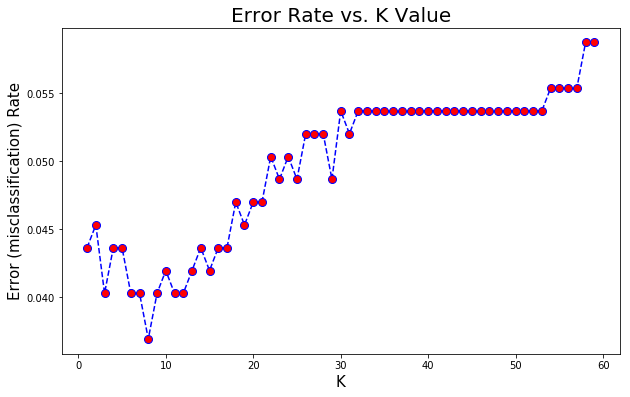

In [302]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

# Predict for the new dataset(Evaluation dataset) value

In [303]:
scaler.fit(df2.drop('Class',axis=1))
scaled_features1 = scaler.transform(df2.drop('Class',axis=1))

In [304]:
df_feat2 = pd.DataFrame(scaled_features1,columns=df2.columns[:-1])
df_feat2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-4.008047,3.373210,-2.001502,-1.936350,-2.659830,-0.239942,-1.363182,4.000592,3.228414,3.359240,...,-0.341083,3.897677,-2.895346,-2.204974,1.621035,-1.863083,1.546956,0.480685,3.529522,3.278574
1,0.939213,-0.854714,0.612476,-0.345656,-0.024899,0.166727,0.820063,-0.739560,0.652066,0.742335,...,-0.148358,-0.641622,-0.050740,1.280450,-0.145976,0.209146,0.233975,-1.688478,-0.566089,-0.767715
2,0.208620,-0.504499,1.101850,-1.125780,0.137103,-0.213487,1.242192,-0.704223,0.310581,0.617962,...,-0.153179,-0.623579,-1.024969,-0.540198,0.463453,0.942408,-0.547968,-0.095071,-0.342298,-0.379158
3,0.367139,-0.435339,0.739755,-0.561792,-0.093023,-0.041949,0.955352,-0.434088,0.071695,0.671029,...,1.976051,-0.441490,-0.165888,0.809014,0.410777,0.400632,-1.395535,-0.009439,-0.244083,0.046385
4,-0.318072,-0.797706,1.378039,-0.811184,0.687975,3.361228,-0.155650,1.181924,0.952599,0.523049,...,0.570475,-0.016082,-0.157094,1.312463,-0.727186,1.588010,0.580583,-0.762631,0.295769,-0.223388


In [305]:

pred = knn.predict(df_feat2)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1])